# Introduction to neuroimaging data with Python

*Written by Luke Chang & Sasha Brietzke* in the [DartBrains](https://dartbrains.org) course. Modified by Arvid Lundervold for the BMED360 course.

In this tutorial we will learn the basics of the organization of data folders, and how to load, plot, and manipulate neuroimaging data in Python.

To introduce the basics of fMRI data structures, watch this short video by Martin Lindquist.

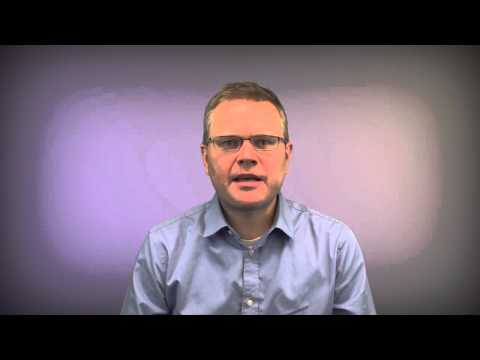

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('OuRdQJMU5ro')

# Software Packages
There are many different software packages to analyze neuroimaging data. Most of them are open source and free to use (with the exception of [BrainVoyager](https://www.brainvoyager.com/)). The most popular ones ([SPM](https://www.fil.ion.ucl.ac.uk/spm/), [FSL](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki), & [AFNI](https://afni.nimh.nih.gov/)) have been around a long time and are where many new methods are developed and distributed. These packages have focused on implementing what they believe are the best statistical methods, ease of use, and computational efficiency. They have very large user bases so many bugs have been identified and fixed over the years. There are also lots of publicly available documentation, listserves, and online tutorials, which makes it very easy to get started using these tools.

There are also many more boutique packages that focus on specific types of preprocessing step and analyses such as spatial normalization with [ANTs](http://stnava.github.io/ANTs/), connectivity analyses with the [conn-toolbox](https://web.conn-toolbox.org/), representational similarity analyses with the [rsaToolbox](https://github.com/rsagroup/rsatoolbox), and prediction/classification with [pyMVPA](http://www.pymvpa.org/).

Many packages have been developed within proprietary software such as [Matlab](https://www.mathworks.com/products/matlab.html) (e.g., SPM, Conn, RSAToolbox, etc). Unfortunately, this requires that your university has site license for Matlab and many individual add-on toolboxes. If you are not affiliated with a University, you may have to pay for Matlab, which can be fairly expensive. There are free alternatives such as [octave](https://www.gnu.org/software/octave/), but octave does not include many of the add-on toolboxes offered by matlab that may be required for a specific package. Because of this restrictive licensing, it is difficult to run matlab on cloud computing servers and to use with free online courses such as dartbrains. Other packages have been written in C/C++/C# and need to be compiled to run on your specific computer and operating system. While these tools are typically highly computationally efficient, it can sometimes be challenging to get them to install and work on specific computers and operating systems.

There has been a growing trend to adopt the open source Python framework in the data science and scientific computing communities, which has lead to an explosion in the number of new packages available for statistics, visualization, machine learning, and web development. [pyMVPA](http://www.pymvpa.org/) was an early leader in this trend, and there are many great tools that are being actively developed such as [nilearn](https://nilearn.github.io/), [brainiak](https://brainiak.org/), [neurosynth](https://github.com/neurosynth/neurosynth), [nipype](https://nipype.readthedocs.io/en/latest/), [fmriprep](https://fmriprep.readthedocs.io/en/stable/), and many more. One exciting thing is that these newer developments have built on the expertise of decades of experience with imaging analyses, and leverage changes in high performance computing. There is also a very tight integration with many cutting edge developments in adjacent communities such as machine learning with [scikit-learn](https://scikit-learn.org/stable/), [tensorflow](https://www.tensorflow.org/), and [pytorch](https://pytorch.org/), which has made new types of analyses much more accessible to the neuroimaging community. There has also been an influx of younger contributors with software development expertise. You might be surprised to know that many of the popular tools being used had core contributors originating from the neuroimaging community (e.g., scikit-learn, seaborn, and many more).

For this course, I have chosen to focus on tools developed in Python as it is an easy to learn programming language, has excellent tools, works well on distributed computing systems, has great ways to disseminate information (e.g., jupyter notebooks, jupyter-book, etc), and is free! If you are just getting started, I would spend some time working with [NiLearn](https://nilearn.github.io/) and [Brainiak](https://brainiak.org/), which have a lot of functionality, are very well tested, are reasonably computationally efficient, and most importantly have lots of documentation and tutorials to get started.

We will be using many packages throughout the course such as [PyBids](https://bids-standard.github.io/pybids/) to navigate neuroimaging datasets, [fmriprep](https://fmriprep.readthedocs.io/en/stable/) to perform preprocessing, and [nltools](https://neurolearn.readthedocs.io/en/latest/), which is a package developed in my lab, to do basic data manipulation and analysis. NLtools is built using many other toolboxes such as [nibabel](https://nipy.org/nibabel/) and [nilearn](https://nilearn.github.io/), and we will also be using these frequently throughout the course.

# BIDS: Brain Imaging Dataset Specification

Recently, there has been growing interest to share datasets across labs and even on public repositories such as [openneuro](https://openneuro.org/). In order to make this a succesful enterprise, it is necessary to have some standards in how the data are named and organized. Historically, each lab has used their own idiosyncratic conventions, which can make it difficult for outsiders to analyze. In the past few years, there have been heroic efforts by the neuroimaging community to create a standardized file organization and naming practices. This specification is called **BIDS** for [Brain Imaging Dataset Specification](http://bids.neuroimaging.io/).

As you can imagine, individuals have their own distinct method of organizing their files. Think about how you keep track of your files on your personal laptop (versus your friend). This may be okay in the personal realm, but in science, it's best if anyone (especially  yourself 6 months from now!) can follow your work and know *which* files mean *what* by their titles.

Here's an example of non-Bids versus BIDS dataset found in [this paper](https://www.nature.com/articles/sdata201644):

![file_tree](./assets/file_tree.jpg)

Here are a few major differences between the two datasets:

1. In BIDS, files are in nifti format (not dicoms).
2. In BIDS, scans are broken up into separate folders by type of scan(functional versus anatomical versus diffusion weighted) for each subject.
3. In BIDS, JSON files are included that contain descriptive information about the scans (e.g., acquisition parameters)

Not only can using this specification be useful within labs to have a set way of structuring data, but it can also be useful when collaborating across labs, developing and utilizing software, and publishing data.

In addition, because this is a consistent format, it is possible to have a python package to make it easy to query a dataset. We recommend using [pybids](https://github.com/bids-standard/pybids).

The dataset we will be working with has already been converted to the BIDS format (see download localizer tutorial). 

You may need to install [pybids]() to query the BIDS datasets using following command `!pip install pybids`.

## The `BIDSLayout`
[Pybids](https://github.com/bids-standard/pybids) is a package to help query and navigate a neurogimaging dataset that is in the BIDs format. At the core of pybids is the `BIDSLayout` object. A `BIDSLayout` is a lightweight Python class that represents a BIDS project file tree and provides a variety of helpful methods for querying and manipulating BIDS files. While the BIDSLayout initializer has a large number of arguments you can use to control the way files are indexed and accessed, you will most commonly initialize a BIDSLayout by passing in the BIDS dataset root location as a single argument.

Notice we are setting `derivatives=True`. This means the layout will also index the derivatives sub folder, which might contain preprocessed data, analyses, or other user generated files. 

In [2]:
from os.path import expanduser, join
home = expanduser('~')
from bids import BIDSLayout, BIDSValidator
import os

data_dir = '%s/prj/DartBrains/data/localizer' % (home)
layout = BIDSLayout(data_dir, derivatives=True)
layout

/home/arvid/anaconda3/envs/bmed360v2020/lib/python3.7/site-packages/bids/layout/layout.py:774: UserWarning: Derivative indexing was requested, but no valid datasets were found in the specified locations (['/home/arvid/prj/DartBrains/data/localizer/derivatives']). Note that all BIDS-Derivatives datasets must meet all the requirements for BIDS-Raw datasets (a common problem is to fail to include a dataset_description.json file in derivatives datasets).
  "datasets).".format(paths))


BIDS Layout: .../prj/DartBrains/data/localizer | Subjects: 94 | Sessions: 0 | Runs: 0

When we initialize a BIDSLayout, all of the files and metadata found under the specified root folder are indexed. This can take a few seconds (or, for very large datasets, a minute or two). Once initialization is complete, we can start querying the BIDSLayout in various ways. The main query method is `.get()`. If we call .`get()` with no additional arguments, we get back a list of all the BIDS files in our dataset.

Let's return the first 10 files

In [3]:
layout.get()[:10]

[<BIDSJSONFile filename='/home/arvid/prj/DartBrains/data/localizer/dataset_description.json'>,
 <BIDSJSONFile filename='/home/arvid/prj/DartBrains/data/localizer/participants.json'>,
 <BIDSDataFile filename='/home/arvid/prj/DartBrains/data/localizer/participants.tsv'>,
 <BIDSDataFile filename='/home/arvid/prj/DartBrains/data/localizer/phenotype/behavioural.tsv'>,
 <BIDSDataFile filename='/home/arvid/prj/DartBrains/data/localizer/phenotype/subject.tsv'>,
 <BIDSFile filename='/home/arvid/prj/DartBrains/data/localizer/README'>,
 <BIDSImageFile filename='/home/arvid/prj/DartBrains/data/localizer/sub-S01/anat/sub-S01_T1w.nii.gz'>,
 <BIDSImageFile filename='/home/arvid/prj/DartBrains/data/localizer/sub-S01/func/sub-S01_task-localizer_bold.nii.gz'>,
 <BIDSDataFile filename='/home/arvid/prj/DartBrains/data/localizer/sub-S01/func/sub-S01_task-localizer_events.tsv'>,
 <BIDSImageFile filename='/home/arvid/prj/DartBrains/data/localizer/sub-S02/anat/sub-S02_T1w.nii.gz'>]

As you can see, just a generic `.get()` call gives us *all* of the files. We will definitely want to be a bit more specific. We can specify the type of data we would like to query. For example, suppose we want to return the first 10 subject ids.

In [4]:
layout.get(target='subject', return_type='id')[:10]

['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10']

Or perhaps, we would like to get the file names for the raw bold functional nifti images for the first 10 subjects. We can filter files in the `raw` or `derivatives`, using `scope` keyword.`scope='raw'`, to only query raw bold nifti files.

In [5]:
layout.get(target='subject', scope='raw', suffix='bold', return_type='file')[:10]

['/home/arvid/prj/DartBrains/data/localizer/sub-S01/func/sub-S01_task-localizer_bold.nii.gz',
 '/home/arvid/prj/DartBrains/data/localizer/sub-S02/func/sub-S02_task-localizer_bold.nii.gz',
 '/home/arvid/prj/DartBrains/data/localizer/sub-S03/func/sub-S03_task-localizer_bold.nii.gz',
 '/home/arvid/prj/DartBrains/data/localizer/sub-S04/func/sub-S04_task-localizer_bold.nii.gz',
 '/home/arvid/prj/DartBrains/data/localizer/sub-S05/func/sub-S05_task-localizer_bold.nii.gz',
 '/home/arvid/prj/DartBrains/data/localizer/sub-S06/func/sub-S06_task-localizer_bold.nii.gz',
 '/home/arvid/prj/DartBrains/data/localizer/sub-S07/func/sub-S07_task-localizer_bold.nii.gz',
 '/home/arvid/prj/DartBrains/data/localizer/sub-S08/func/sub-S08_task-localizer_bold.nii.gz',
 '/home/arvid/prj/DartBrains/data/localizer/sub-S09/func/sub-S09_task-localizer_bold.nii.gz',
 '/home/arvid/prj/DartBrains/data/localizer/sub-S10/func/sub-S10_task-localizer_bold.nii.gz']

When you call .get() on a BIDSLayout, the default returned values are objects of class BIDSFile. A BIDSFile is a lightweight container for individual files in a BIDS dataset. 

Here are some of the attributes and methods available to us in a BIDSFile (note that some of these are only available for certain subclasses of BIDSFile; e.g., you can't call get_image() on a BIDSFile that doesn't correspond to an image file!):

- .path: The full path of the associated file
- .filename: The associated file's filename (without directory)
- .dirname: The directory containing the file
- .get_entities(): Returns information about entities associated with this BIDSFile (optionally including metadata)
- .get_image(): Returns the file contents as a nibabel image (only works for image files)
- .get_df(): Get file contents as a pandas DataFrame (only works for TSV files)
- .get_metadata(): Returns a dictionary of all metadata found in associated JSON files
- .get_associations(): Returns a list of all files associated with this one in some way

Let's explore the first file in a little more detail.

In [6]:
f = layout.get()[0]
f

<BIDSJSONFile filename='/home/arvid/prj/DartBrains/data/localizer/dataset_description.json'>

If we wanted to get the path of the file, we can use `.path`.

In [7]:
f.path

'/home/arvid/prj/DartBrains/data/localizer/dataset_description.json'

Suppose we were interested in getting a list of tasks included in the dataset.

In [8]:
layout.get_task()

['localizer']

We can query all of the files associated with this task.

In [9]:
layout.get(task='localizer', suffix='bold', scope='raw')[:10]

[<BIDSImageFile filename='/home/arvid/prj/DartBrains/data/localizer/sub-S01/func/sub-S01_task-localizer_bold.nii.gz'>,
 <BIDSImageFile filename='/home/arvid/prj/DartBrains/data/localizer/sub-S02/func/sub-S02_task-localizer_bold.nii.gz'>,
 <BIDSImageFile filename='/home/arvid/prj/DartBrains/data/localizer/sub-S03/func/sub-S03_task-localizer_bold.nii.gz'>,
 <BIDSImageFile filename='/home/arvid/prj/DartBrains/data/localizer/sub-S04/func/sub-S04_task-localizer_bold.nii.gz'>,
 <BIDSImageFile filename='/home/arvid/prj/DartBrains/data/localizer/sub-S05/func/sub-S05_task-localizer_bold.nii.gz'>,
 <BIDSImageFile filename='/home/arvid/prj/DartBrains/data/localizer/sub-S06/func/sub-S06_task-localizer_bold.nii.gz'>,
 <BIDSImageFile filename='/home/arvid/prj/DartBrains/data/localizer/sub-S07/func/sub-S07_task-localizer_bold.nii.gz'>,
 <BIDSImageFile filename='/home/arvid/prj/DartBrains/data/localizer/sub-S08/func/sub-S08_task-localizer_bold.nii.gz'>,
 <BIDSImageFile filename='/home/arvid/prj/DartBr

Notice that there are nifti and event files. We can get the filename for the first particant's functional run

In [10]:
f = layout.get(task='localizer')[0].filename
f

'sub-S01_task-localizer_bold.nii.gz'

If you want a summary of all the files in your BIDSLayout, but don't want to have to iterate BIDSFile objects and extract their entities, you can get a nice bird's-eye view of your dataset using the `to_df()` method.

In [11]:
layout.to_df()

entity                                               path datatype extension  \
0       /home/arvid/prj/DartBrains/data/localizer/data...      NaN      json   
1       /home/arvid/prj/DartBrains/data/localizer/part...      NaN      json   
2       /home/arvid/prj/DartBrains/data/localizer/part...      NaN       tsv   
3       /home/arvid/prj/DartBrains/data/localizer/phen...      NaN       tsv   
4       /home/arvid/prj/DartBrains/data/localizer/phen...      NaN       tsv   
..                                                    ...      ...       ...   
284     /home/arvid/prj/DartBrains/data/localizer/sub-...     anat    nii.gz   
285     /home/arvid/prj/DartBrains/data/localizer/sub-...     func    nii.gz   
286     /home/arvid/prj/DartBrains/data/localizer/sub-...     func       tsv   
287     /home/arvid/prj/DartBrains/data/localizer/task...      NaN      json   
288      /home/arvid/prj/DartBrains/data/localizer/README      NaN       NaN   

entity subject        suffix       task  
0          NaN   description        NaN  
1          NaN  participants        NaN  
2          NaN  participants        NaN  
3          NaN   behavioural        NaN  
4          NaN       subject        NaN  
..         ...           ...        ...  
284        S94           T1w        NaN  
285        S94          bold  localizer  
286        S94        events  localizer  
287        NaN          bold  localizer  
288        NaN           NaN        NaN  

[289 rows x 6 columns]

# Loading Data with Nibabel
Neuroimaging data is often stored in the format of nifti files `.nii` which can also be compressed using gzip `.nii.gz`.  These files store both 3D and 4D data and also contain structured metadata in the image **header**.

There is an very nice tool to access nifti data stored on your file system in python called [nibabel](http://nipy.org/nibabel/).  If you don't already have nibabel installed on your computer it is easy via `pip`. First, tell the jupyter cell that you would like to access the unix system outside of the notebook and then install nibabel using pip `!pip install nibabel`. You only need to run this once (unless you would like to update the version).

nibabel objects can be initialized by simply pointing to a nifti file even if it is compressed through gzip.  First, we will import the nibabel module as `nib` (short and sweet so that we don't have to type so much when using the tool).  I'm also including a path to where the data file is located so that I don't have to constantly type this.  It is easy to change this on your own computer.

We will be loading an anatomical image from subject S01 from the localizer [dataset](http://brainomics.cea.fr/localizer/).  See this [paper](https://bmcneurosci.biomedcentral.com/articles/10.1186/1471-2202-8-91) for more information about this dataset.

We will use pybids to grab subject S01's T1 image.

In [12]:
help(layout.get)

Help on method get in module bids.layout.layout:

get(return_type='object', target=None, scope='all', regex_search=False, absolute_paths=None, drop_invalid_filters=True, **filters) method of bids.layout.layout.BIDSLayout instance
    Retrieve files and/or metadata from the current Layout.
    
    Parameters
    ----------
    return_type : str, optional
        Type of result to return. Valid values:
        'object' (default): return a list of matching BIDSFile objects.
        'file' or 'filename': return a list of matching filenames.
        'dir': return a list of directories.
        'id': return a list of unique IDs. Must be used together
              with a valid target.
    target : str, optional
        Optional name of the target entity to get results for
        (only used if return_type is 'dir' or 'id').
    scope : str or list, optional
        Scope of the search space. If passed, only
        nodes/directories that match the specified scope will be
        searched. P

In [13]:
layout.get(subject='S01',  scope='all', suffix='T1w', return_type='file')[0]

'/home/arvid/prj/DartBrains/data/localizer/sub-S01/anat/sub-S01_T1w.nii.gz'

In [14]:
import nibabel as nib

# data = nib.load(layout.get(subject='S01', scope='derivatives', suffix='T1w', return_type='file', extension='nii.gz')[1])
data = nib.load(layout.get(subject='S01', scope='all', suffix='T1w', return_type='file', extension='nii.gz')[0])

If we want to get more help on how to work with the nibabel data object we can either consult the [documentation](https://nipy.org/nibabel/tutorials.html#tutorials) or add a `?`.

In [15]:
data?

The imaging data is stored in either a 3D or 4D numpy array. Just like numpy, it is easy to get the dimensions of the data using `shape`. 

In [16]:
data.shape

(192, 256, 128)

Looks like there are 3 dimensions (x,y,z) that is the number of voxels in each dimension. If we know the voxel size, we could convert this into millimeters.

We can also directly access the data and plot a single slice using standard matplotlib functions.

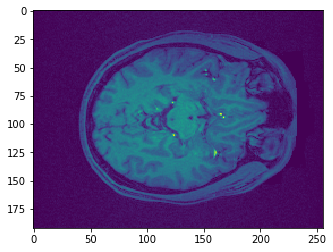

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data.get_fdata()[:,:,50])
plt.show()

Try slicing different dimensions (x,y,z) yourself to get a feel for how the data is represented in this anatomical image.

We can also access data from the image header. Let's assign the header of an image to a variable and print it to view it's contents.

In [18]:
header = data.header
print(header)      

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 192 256 128   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.   1.   1.   1.2  0.   1.   1.   1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer Mar  1 2013'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 96.0
qoffset_y       : -128.0
qoffset_z       : -76.8
srow_x    

Some of the important information in the header is information about the orientation of the image in space. This can be represented as the affine matrix, which can be used to transform images between different spaces.

In [19]:
data.affine

array([[  -1.        ,    0.        ,    0.        ,   96.        ],
       [   0.        ,    1.        ,    0.        , -128.        ],
       [   0.        ,    0.        ,    1.20000005,  -76.80000305],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

We will dive deeper into affine transformations in the preprocessing tutorial.

# Plotting Data with Nilearn
There are many useful tools from the [nilearn](https://nilearn.github.io/index.html) library to help manipulate and visualize neuroimaging data. See their [documentation](https://nilearn.github.io/plotting/index.html#different-plotting-functions) for an example.

In this section, we will explore a few of their different plotting functions, which can work directly with nibabel instances.

In [20]:
%matplotlib inline

from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_epi

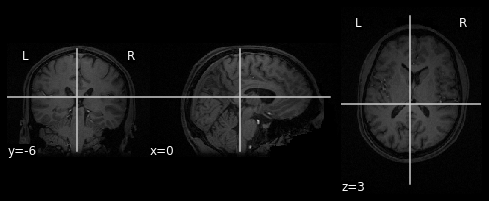

In [21]:
plot_anat(data)
plt.show()

Nilearn plotting functions are very flexible and allow us to easily customize our plots

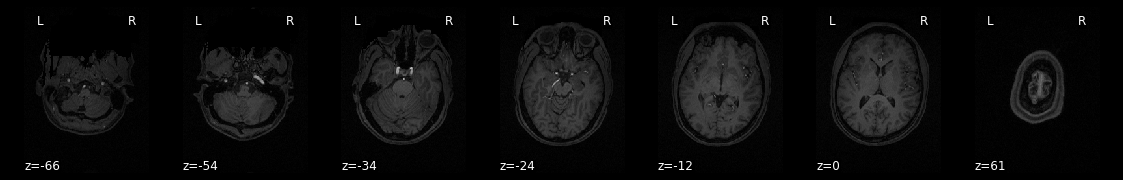

In [22]:
plot_anat(data, draw_cross=False, display_mode='z')
plt.show()

try to get more information how to use the function with `?` and try to add different commands to change the plot.

nilearn also has a neat interactive viewer called `view_img` for examining images directly in the notebook. 


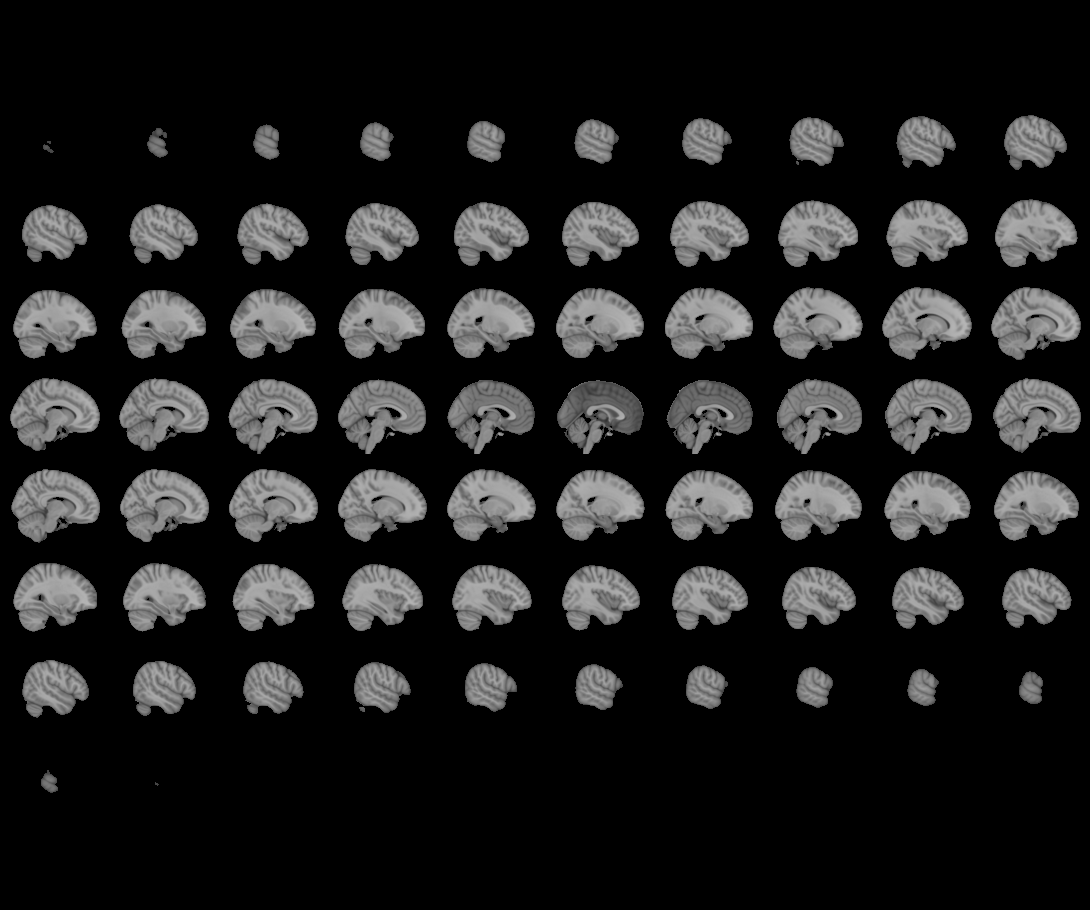
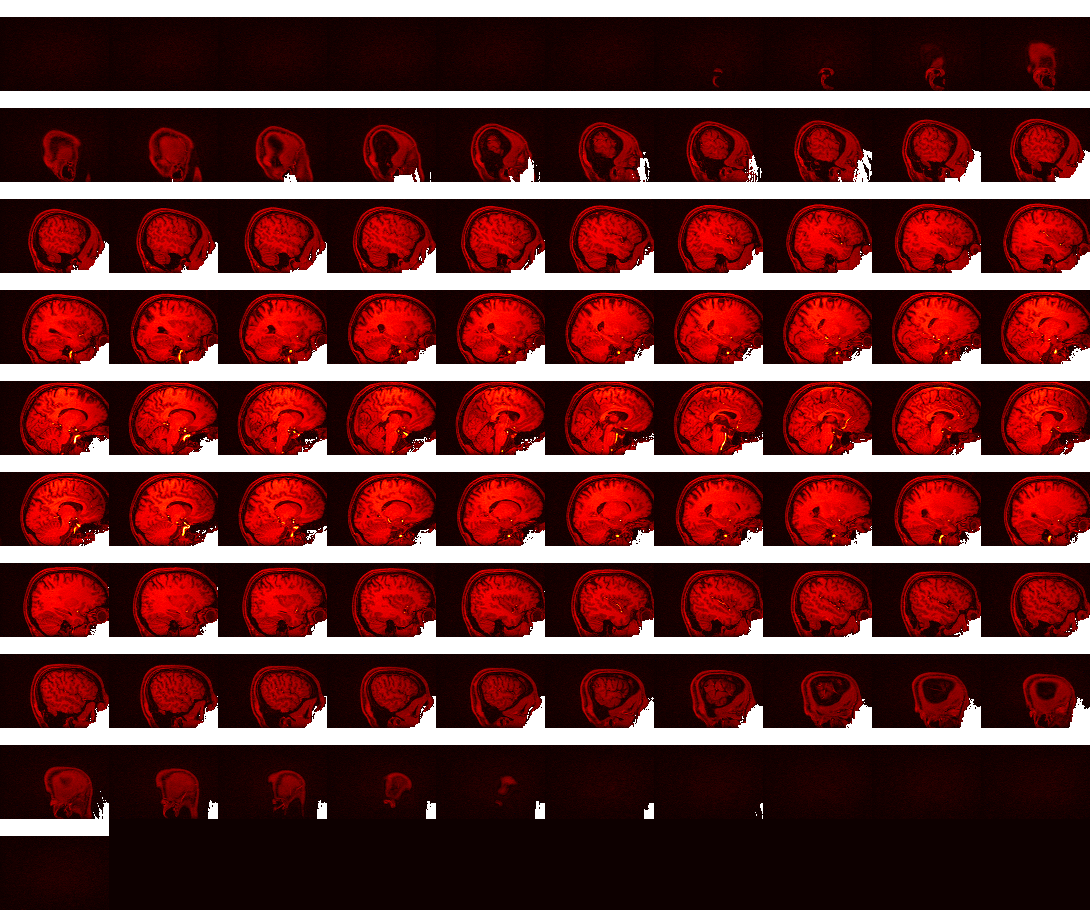

In [23]:
view_img(data)

The `view_img` function is particularly useful for overlaying statistical maps over an anatomical image so that we can interactively examine where the results are located.

As an example, let's load a mask of the amygdala and try to find where it is located.

/home/arvid/anaconda3/envs/bmed360v2020/lib/python3.7/site-packages/nilearn/image/resampling.py:513: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))



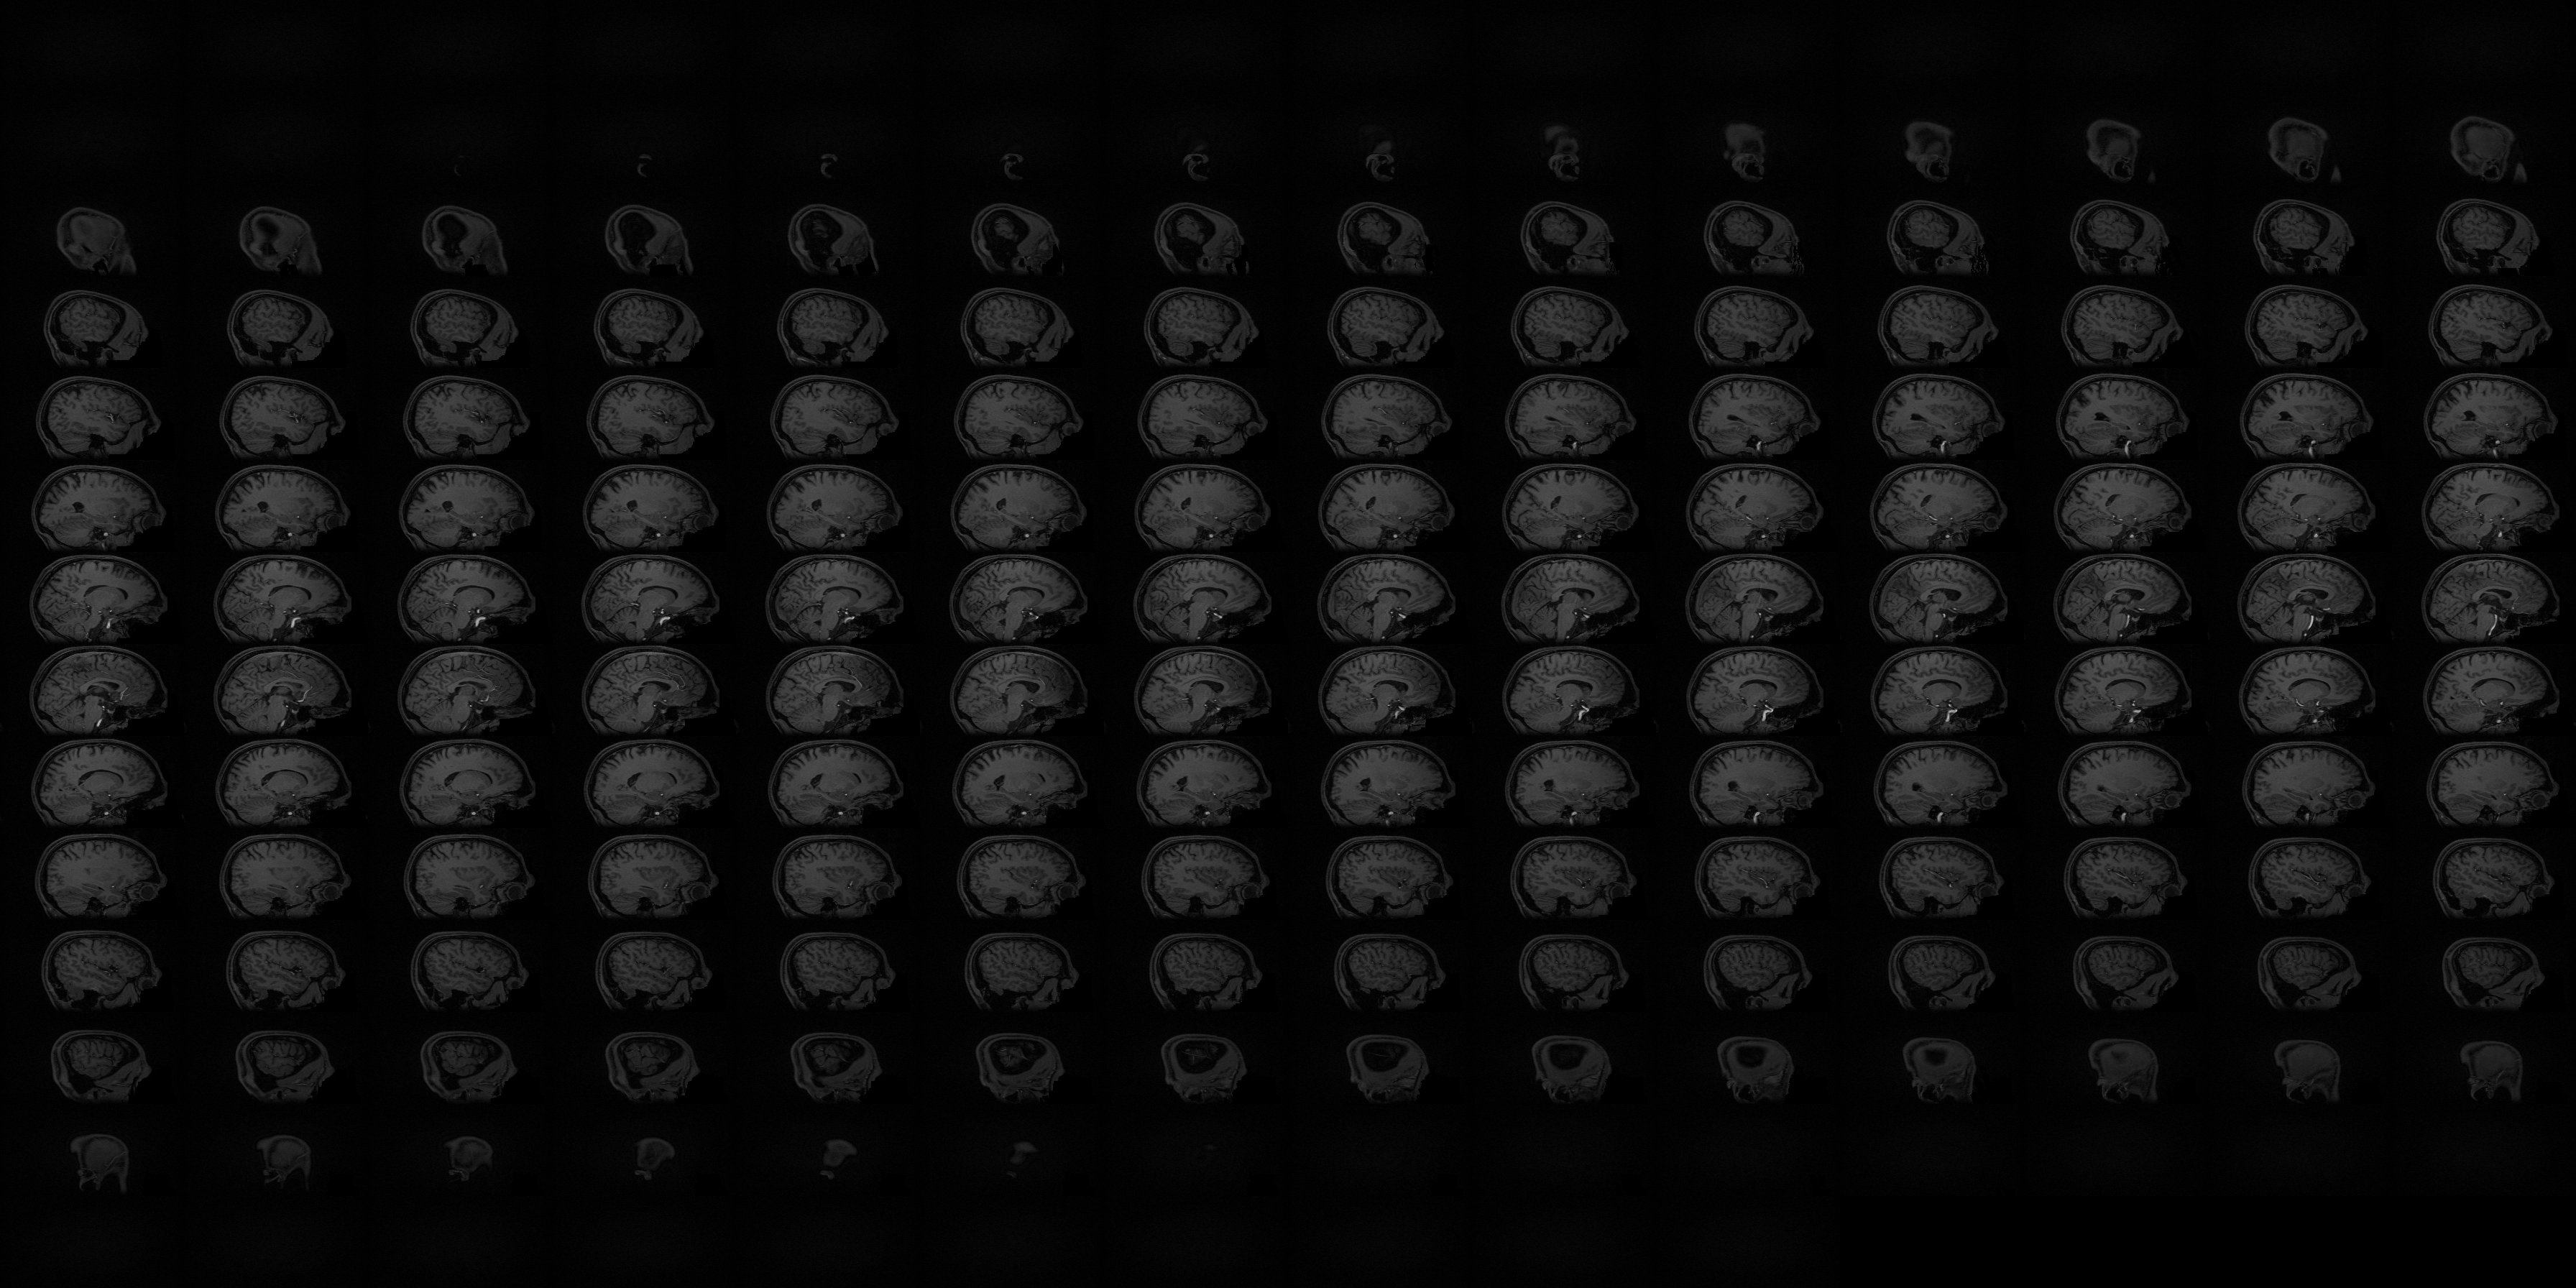
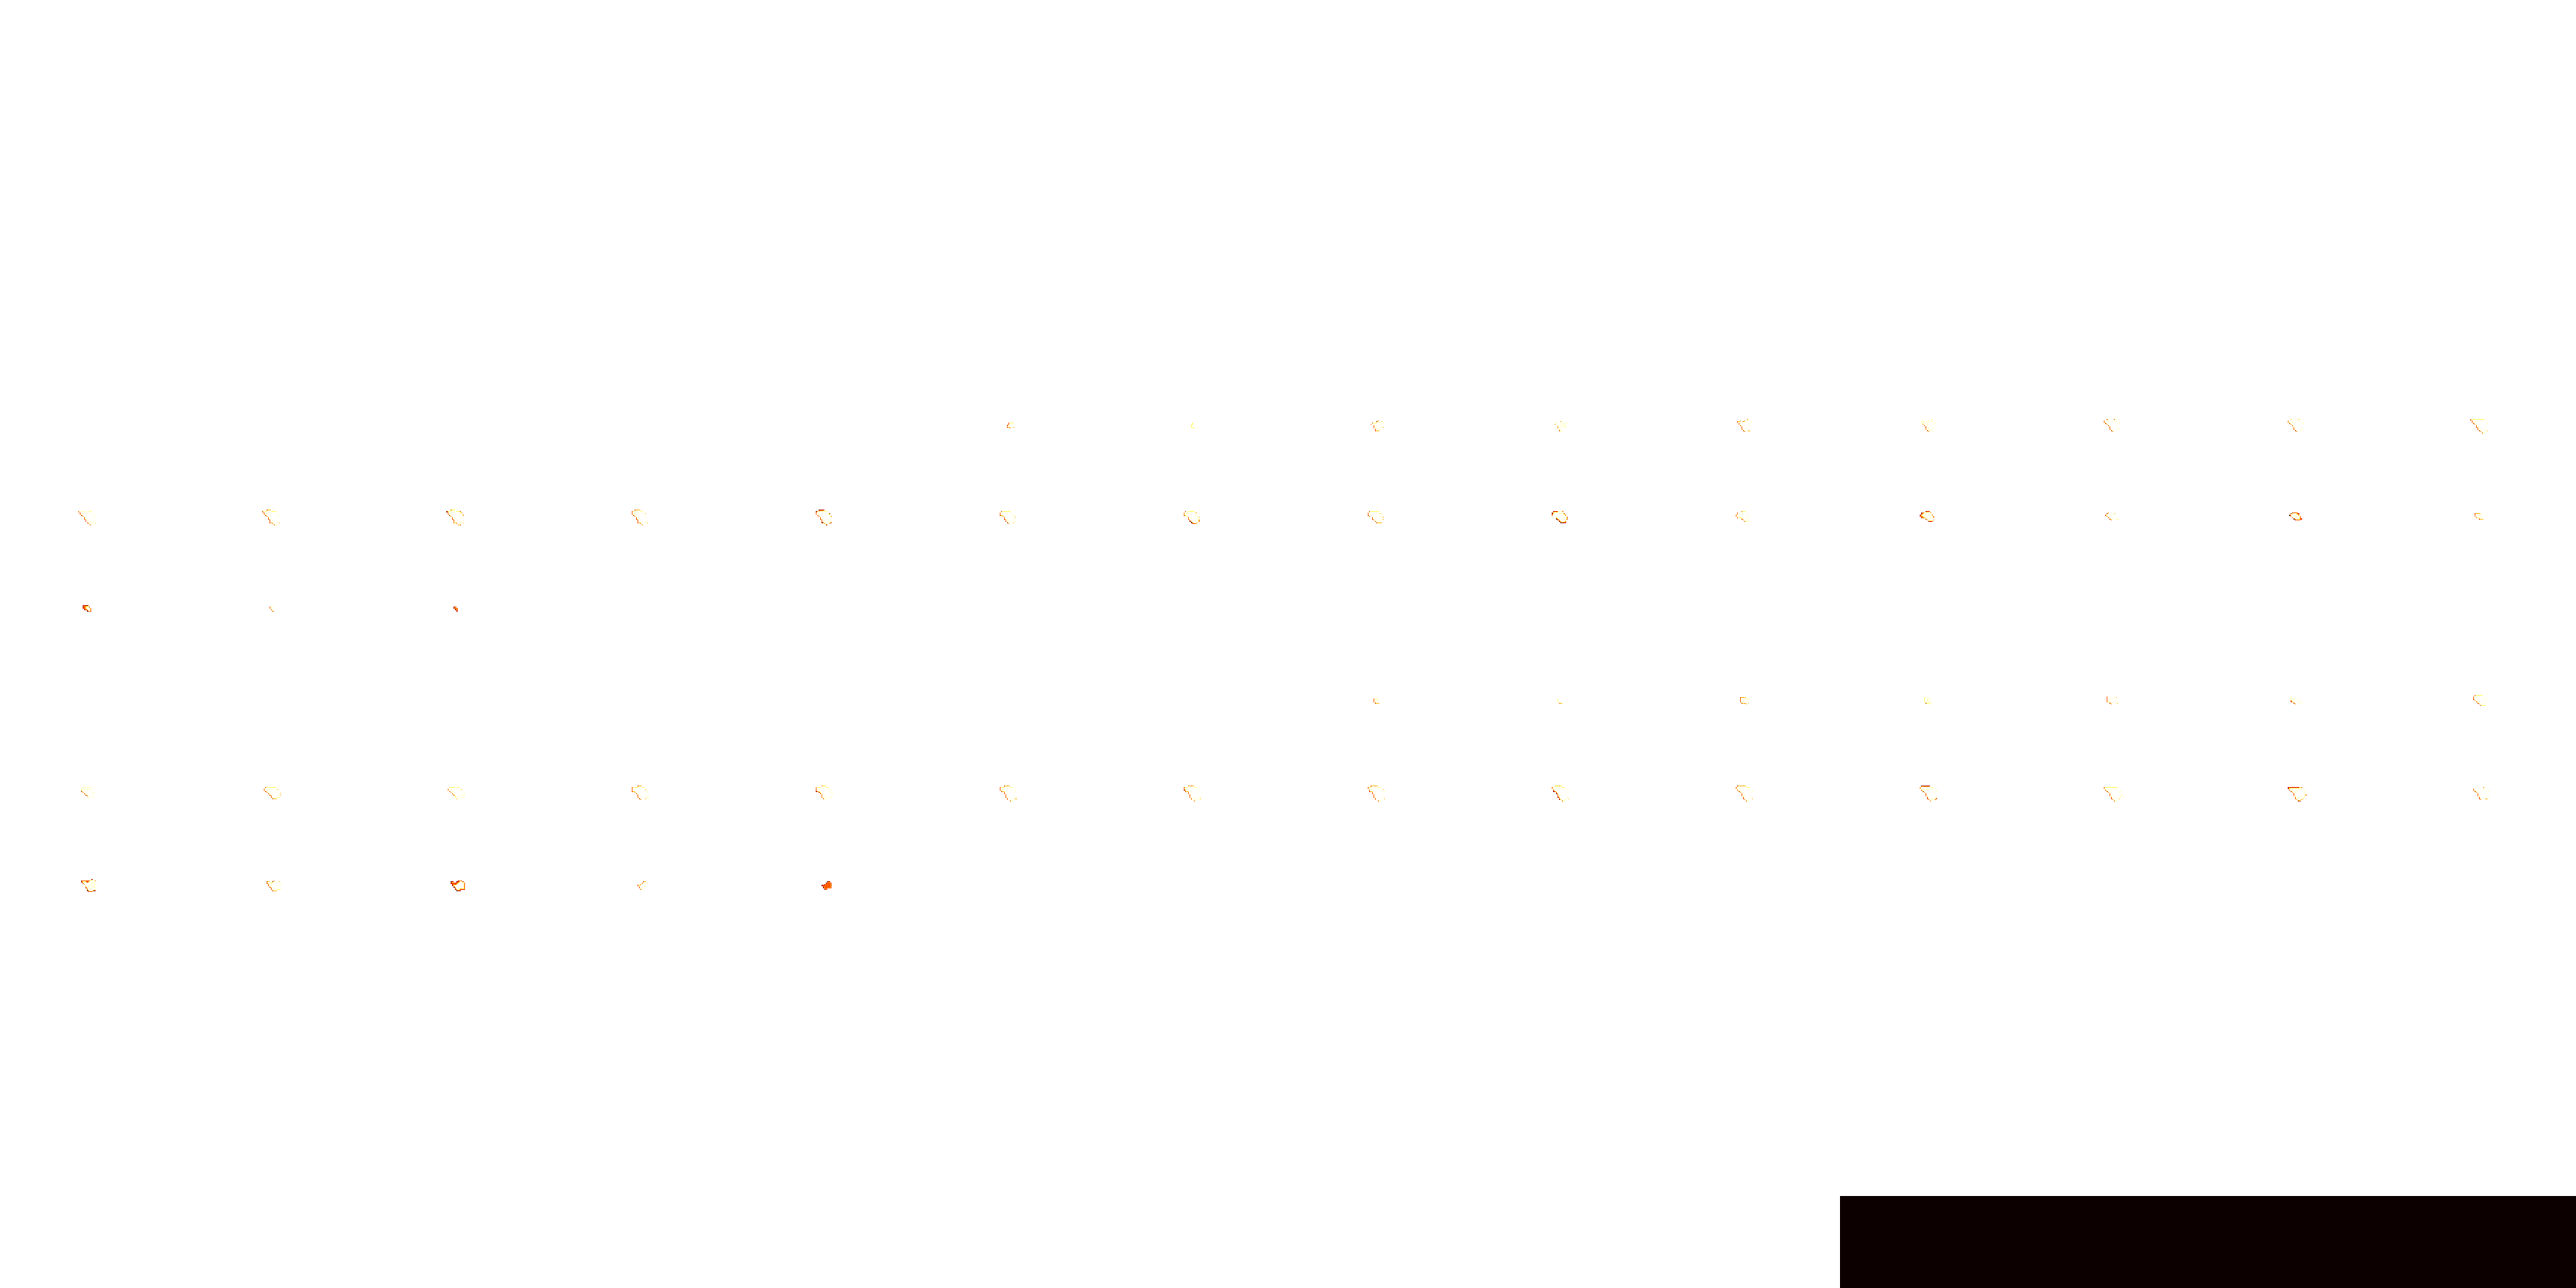

In [24]:
amygdala_mask = nib.load(os.path.join('.', 'data', 'FSL_BAmyg_thr0.nii.gz'))
view_img(amygdala_mask, data)

We can also plot a glass brain which allows us to see through the brain from different slice orientations. In this example, we will plot the binary amygdala mask.

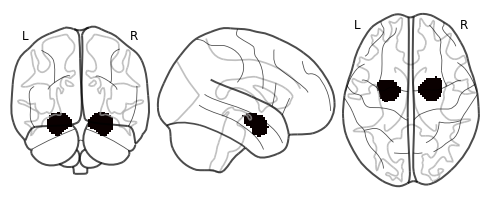

In [25]:
plot_glass_brain(amygdala_mask)
plt.show()

# Manipulating Data with Nltools
Ok, we've now learned how to use nibabel to load imaging data and nilearn to plot it.

Next we are going to learn how to use the `nltools` package that tries to make loading, plotting, and manipulating data easier. It uses many functions from nibabe, nilearn, and other python libraries. The bulk of the nltools toolbox is built around the `Brain_Data()` class. The concept behind the class is to have a similar feel to a pandas dataframe, which means that it should feel intuitive to manipulate the data.

The `Brain_Data()` class has several attributes that may be helpful to know about. First, it stores imaging data in `.data` as a vectorized features by observations matrix. Each image is an observation and each voxel is a feature. Space is flattened using `nifti_masker` from nilearn. This object is also stored as an attribute in `.nifti_masker` to allow transformations from 2D to 3D/4D matrices. In addition, a brain_mask is stored in `.mask`. Finally, there are attributes to store either class labels for prediction/classification analyses in `.Y` and design matrices in `.X`. These are both expected to be pandas `DataFrames`.

We will give a quick overview of basic Brain_Data operations, but we encourage you to see our [documentation](https://neurolearn.readthedocs.io/en/latest/index.html) for more details.

## Brain_Data basics
To get a feel for `Brain_Data`, let's load an example anatomical overlay image that comes packaged with the toolbox.

In [26]:
from nltools.data import Brain_Data
from nltools.utils import get_anatomical

anat = Brain_Data(get_anatomical())
anat

/home/arvid/anaconda3/envs/bmed360v2020/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

To view the attributes of `Brain_Data` use the `vars()` function.

In [27]:
print(vars(anat))

{'mask': <nibabel.nifti1.Nifti1Image object at 0x7fa16c155750>, 'nifti_masker': NiftiMasker(detrend=False, dtype=None, high_pass=None, low_pass=None,
            mask_args=None,
            mask_img=<nibabel.nifti1.Nifti1Image object at 0x7fa16c155750>,
            mask_strategy='background', memory=Memory(cachedir=None),
            memory_level=1, reports=True, sample_mask=None, sessions=None,
            smoothing_fwhm=None, standardize=False, t_r=None,
            target_affine=None, target_shape=None, verbose=0), 'data': array([1875., 2127., 2182., ..., 5170., 5180., 2836.], dtype=float32), 'Y': Empty DataFrame
Columns: []
Index: [], 'X': Empty DataFrame
Columns: []
Index: [], 'file_name': []}


`Brain_Data` has many methods to help manipulate, plot, and analyze imaging data. We can use the `dir()` function to get a quick list of all of the available methods that can be used on this class.

To learn more about how to use these tools either use the `?` function, or look up the function in the [api documentation](https://neurolearn.readthedocs.io/en/latest/api.html).


In [28]:
print(dir(anat))

['X', 'Y', '__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rsub__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', 'aggregate', 'align', 'append', 'apply_mask', 'astype', 'bootstrap', 'copy', 'data', 'decompose', 'detrend', 'distance', 'dtype', 'empty', 'extract_roi', 'file_name', 'filter', 'find_spikes', 'groupby', 'icc', 'iplot', 'isempty', 'mask', 'mean', 'median', 'multivariate_similarity', 'nifti_masker', 'plot', 'predict', 'predict_multi', 'r_to_z', 'randomise', 'regions', 'regress', 'scale', 'shape', 'similarity', 'smooth', 'standardize', 'std', 'sum', 'threshold', 'to_nifti', 'transform_pairwise', 'ttest', '

Ok, now let's load a single subject's functional data from the localizer dataset. We will load one that has already been preprocessed with fmriprep and is stored in the derivatives folder.

Loading data can be a little bit slow especially if the data need to be resampled to the template, which is set at $2mm^3$ by default. However, once it's loaded into the workspace it should be relatively fast to work with it.


In [29]:
# data = Brain_Data(layout.get(target='subject', scope='derivatives', suffix='bold', extension='nii.gz', return_type='file')[0])
data = Brain_Data(layout.get(target='subject', scope='all', suffix='bold', extension='nii.gz', return_type='file')[0])

Here are a few quick basic data operations.

Find number of images in Brain_Data() instance

In [30]:
print(len(data))

128


Find the dimensions of the data (images x voxels)

In [31]:
print(data.shape())

(128, 238955)


We can use any type of indexing to slice the data such as integers, lists of integers, slices, or boolean vectors.

In [32]:
import numpy as np

print(data[5].shape())

print(data[[1,6,2]].shape())

print(data[0:10].shape())

index = np.zeros(len(data), dtype=bool)
index[[1,5,9, 16, 20, 22]] = True

print(data[index].shape())

(238955,)
(3, 238955)
(10, 238955)
(6, 238955)


## Simple Arithmetic Operations

Calculate the mean for every voxel over images

In [33]:
data.mean()

nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

Calculate the standard deviation for every voxel over images

In [34]:
data.std()

nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

Methods can be chained.  Here we get the shape of the mean.

In [35]:
print(data.mean().shape())

(238955,)


Brain_Data instances can be added and subtracted

In [36]:
new = data[1]+data[2]

Brain_Data instances can be manipulated with basic arithmetic operations.

Here we add 10 to every voxel and scale by 2

In [37]:
data2 = (data + 10) * 2


Brain_Data instances can be copied

In [38]:
new = data.copy()

Brain_Data instances can be easily converted to nibabel instances, which store the data in a 3D/4D matrix.  This is useful for interfacing with other python toolboxes such as [nilearn](http://nilearn.github.io)


In [39]:
data.to_nifti()

Brain_Data instances can be concatenated using the append method

In [40]:
new = new.append(data[4])

Lists of `Brain_Data` instances can also be concatenated by recasting as a `Brain_Data` object.

In [41]:
print(type([x for x in data[:4]]))

type(Brain_Data([x for x in data[:4]]))

<class 'list'>


nltools.data.brain_data.Brain_Data

Any Brain_Data object can be written out to a nifti file.

In [42]:
data.write('%s/tmp/Tmp_Data.nii.gz' % (home))

Images within a Brain_Data() instance are iterable.  Here we use a list comprehension to calculate the overall mean across all voxels within an image.

In [43]:
[x.mean() for x in data]

[2715.00470509518,
 2720.942222329117,
 2718.131288468317,
 2713.683277239194,
 2710.193580881534,
 2714.6915202300675,
 2728.988391862989,
 2735.5402076146624,
 2732.949143233183,
 2736.529542121691,
 2730.776056970268,
 2725.4009527868097,
 2725.4418949422443,
 2726.871858913799,
 2727.0179285728896,
 2727.2733928329967,
 2730.595579668864,
 2732.0083904445123,
 2725.8408072337807,
 2722.7348141693137,
 2722.3056647537587,
 2724.0347496565755,
 2713.858796502537,
 2716.96121307036,
 2715.647875302694,
 2718.907218885878,
 2717.8716584812546,
 2723.161320817521,
 2722.9213421344584,
 2714.90636096079,
 2722.5212501794285,
 2733.288253050372,
 2727.3124234236875,
 2719.2650013304997,
 2722.566818050508,
 2717.517243832535,
 2718.057922841943,
 2724.173573600623,
 2719.8097496124165,
 2711.8907730760116,
 2705.961186429626,
 2710.06245316126,
 2708.3987698337683,
 2704.265984806936,
 2716.8581984028947,
 2710.550409650116,
 2710.3741346182755,
 2703.2219445342944,
 2701.251089876949,
 2

Though, we could also do this with the `mean` method by setting `axis=1`.

In [44]:
data.mean(axis=1)

array([2715.0047051 , 2720.94222233, 2718.13128847, 2713.68327724,
       2710.19358088, 2714.69152023, 2728.98839186, 2735.54020761,
       2732.94914323, 2736.52954212, 2730.77605697, 2725.40095279,
       2725.44189494, 2726.87185891, 2727.01792857, 2727.27339283,
       2730.59557967, 2732.00839044, 2725.84080723, 2722.73481417,
       2722.30566475, 2724.03474966, 2713.8587965 , 2716.96121307,
       2715.6478753 , 2718.90721889, 2717.87165848, 2723.16132082,
       2722.92134213, 2714.90636096, 2722.52125018, 2733.28825305,
       2727.31242342, 2719.26500133, 2722.56681805, 2717.51724383,
       2718.05792284, 2724.1735736 , 2719.80974961, 2711.89077308,
       2705.96118643, 2710.06245316, 2708.39876983, 2704.26598481,
       2716.8581984 , 2710.55040965, 2710.37413462, 2703.22194453,
       2701.25108988, 2696.20319609, 2706.32071102, 2707.37676321,
       2713.12281281, 2710.32656441, 2713.77963459, 2709.88807312,
       2706.22464569, 2703.84147303, 2707.96269137, 2708.64661

Let's plot the mean to see how the global signal changes over time.

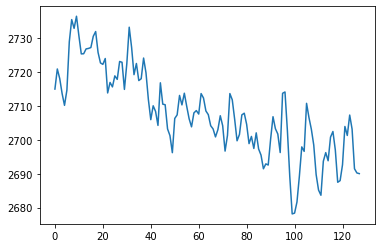

In [45]:
plt.plot(data.mean(axis=1))
plt.show()

Notice the slow linear drift over time, where the global signal intensity gradually decreases. We will learn how to remove this with a high pass filter in future tutorials.

## Plotting
There are multiple ways to plot your data.

For a very quick plot, you can return a montage of axial slices with the `.plot()` method. As an example, we will plot the mean of each voxel over time.

threshold is ignored for simple axial plots


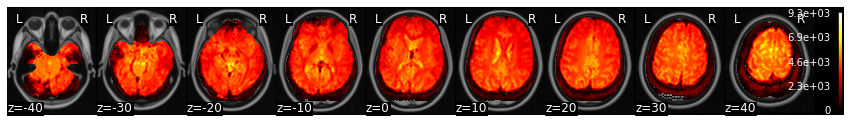

In [46]:
f = data.mean().plot()

There is an interactive `.iplot()` method based on nilearn `view_img`.

In [47]:
data.mean().iplot()

interactive(children=(FloatText(value=0.0, description='Threshold'), HTML(value='Image is 3D', description='Vo…

Brain_Data() instances can be converted to a nibabel instance and plotted using any nilearn plot method such as glass brain.


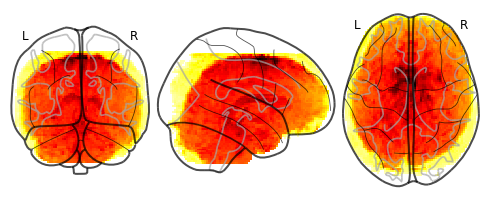

In [48]:
plot_glass_brain(data.mean().to_nifti())
plt.show()

Ok, that's the basics. `Brain_Data` can do much more!

Check out some of our [tutorials](https://neurolearn.readthedocs.io/en/latest/auto_examples/index.html) for more detailed examples.

We'll be using this tool throughout the course.

# Exercises

For homework, let's practice our skills in working with data.

## Exercise 1
A few subjects have already been preprocessed with fMRI prep.

Use pybids to figure out which subjects have been preprocessed.

## Exercise 2

One question we are often interested in is where in the brain do we have an adequate signal to noise ratio (SNR). There are many different metrics, here we will use temporal SNR, which the voxel mean over time divided by it's standard deviation. 
$$\text{tSNR} = \frac{\text{mean(voxel_{i})}}{\text{std(voxel_{i})}}$$

In Exercise 2, calculate the SNR for S01 and plot this so we can figure which regions have high and low SNR.

## Exercise 3

We are often interested in identifying outliers in our data. In this exercise, find any image from 'S01' that exceeds a zscore of 2 and plot each one.